<h2 style="color:red;text-align:center;font-weight:bold;">AeroStream Analytics</h2>

AeroStream Analytics est un système intelligent de classification automatique des avis clients des compagnies aériennes. Il analyse en temps réel le sentiment des utilisateurs afin de mesurer leur niveau de satisfaction et fournir des indicateurs clés de performance.

**Objectifs :**

Développer un système de classification automatique des avis clients en temps réel, Le
système devra permettre de:

- Collecter et prétraiter les avis clients,

- Analyser automatiquement le sentiment et la satisfaction,

- Générer des indicateurs de performance par compagnie aérienne,

- Visualiser les résultats via un tableau de bord interactif.

![Python](https://img.shields.io/badge/Python-3.9%2B-blue)
![Airflow](https://img.shields.io/badge/Apache%20Airflow-Orchestration-green)
![Streamlit](https://img.shields.io/badge/Streamlit-Dashboard-red)
![ChromaDB](https://img.shields.io/badge/ChromaDB-Vector%20Store-orange)

<br>

<h3 style="color:green;font-weight:bold;">Analyse Exploratoire des Données :</h3>

<h4 style="color:orange;font-weight:bold;">1. Charger le Dataset :</h4>

In [1]:
import pandas as pd

df = pd.read_csv("../data/raw/data.csv")

print("Data Chargée avec Succès !")

Data Chargée avec Succès !


In [2]:
df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)


<h4 style="color:orange;font-weight:bold;">2. Analyser la Structure des Colonnes et leurs Types :</h4>

In [3]:
df.dtypes

tweet_id                        float64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
name                             object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

| Colonne                          | Type    | Signification                                   | Interprétation / Utilisation                                                                                          |
| -------------------------------- | ------- | ----------------------------------------------- | --------------------------------------------------------------------------------------------------------------------- |
| **tweet_id**                     | float64 | Identifiant unique du tweet                     | Permet d’identifier chaque avis de manière unique.                  |
| **airline_sentiment**            | object  | Sentiment global associé au tweet               | **Label cible** du projet : `positive`, `neutral`, `negative`. |
| **airline_sentiment_confidence** | float64 | Confiance associée au sentiment attribué        | Indique la fiabilité de l’annotation du sentiment (plus la valeur est proche de 1, plus l’annotation est fiable).     |
| **negativereason**               | object  | Raison du mécontentement (si sentiment négatif) | Explique pourquoi le tweet est négatif. |
| **negativereason_confidence**    | float64 | Confiance associée à la raison négative         | Mesure la fiabilité de l’annotation de la cause du sentiment négatif.                                                 |
| **airline**                      | object  | Compagnie aérienne concernée                    | Permet d’agréger les résultats par compagnie (KPI, taux de satisfaction, comparaisons).                               |
| **name**                         | object  | Nom d’utilisateur Twitter                       | Information contextuelle, généralement **non utilisée**.                                 |
| **retweet_count**                | int64   | Nombre de retweets du tweet                     | Indicateur de visibilité ou d’impact du tweet.                     |
| **text**                         | object  | Contenu textuel du tweet                        | **Donnée principale d’entrée** du modèle NLP (nettoyage, embeddings, classification).                                 |
| **tweet_coord**                  | object  | Coordonnées géographiques du tweet              | Rarement renseigné ; peut être utilisé pour une analyse géographique.                                     |
| **tweet_created**                | object  | Date et heure de création du tweet              | Utile pour des analyses temporelles (tendances, pics de mécontentement).                                              |
| **tweet_location**               | object  | Localisation déclarée par l’utilisateur         | Donnée textuelle libre, bruitée, parfois exploitable pour analyses régionales.                                        |
| **user_timezone**                | object  | Fuseau horaire de l’utilisateur                 | Peut servir à des analyses temporelles par région, mais souvent incomplet.                                            |

**Résumé :**

- Feature principale (X) : `text`.

- Label (y) : `airline_sentiment`.

<h4 style="color:orange;font-weight:bold;">3. Analyser les Statistiques Générales :</h4>

In [4]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791092e+14,0.162830,0.330440,0.745778
min,5.675880e+17,0.335000,0.000000,0.000000
25%,5.685590e+17,0.692300,0.360600,0.000000
50%,5.694780e+17,1.000000,0.670600,0.000000
75%,5.698902e+17,1.000000,1.000000,0.000000
max,5.703110e+17,1.000000,1.000000,44.000000


| Variable (Colonne)                                          | Statistique Clé                            | Interprétation Métier                                                                                                                          | Action                                                                                                               |
| ----------------------------------------------------------- | ------------------------------------------ | ---------------------------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Volume Total (count)**                                    | 14 640 lignes                              | Volume de données suffisant pour entraîner un modèle NLP robuste et stable.                                                                    | Utiliser l’ensemble du dataset pour effectuer un split Train / Test (ex. 80 / 20).                                                                  |
| **Confiance du Sentiment (`airline_sentiment_confidence`)** | Moyenne : 0.90  | Min : 0.33               | La majorité des labels sont fiables, mais certaines annotations restent bruitées ou incertaines.                                               | Filtrage : supprimer les lignes dont la confiance est < 0.6 ou 0.7 afin d’améliorer la qualité d’apprentissage du modèle.                           |
| **Confiance de la Raison (`negativereason_confidence`)**    | Moyenne : 0.64  | 4 118 valeurs manquantes | La catégorisation des causes négatives est plus difficile. Les valeurs manquantes correspondent principalement aux tweets positifs ou neutres. | Imputation : remplacer les valeurs manquantes par « Aucune » ou « Inconnu ». À utiliser uniquement pour les KPI, pas pour l’entraînement du modèle. |
| **Viralité (`retweet_count`)**                              | 75 % des tweets = 0  | Max = 44            | Les tweets relèvent majoritairement de conversations de service client (one-to-one), et non de contenus viraux.                                | Suppression : ne pas utiliser cette variable comme feature du modèle (faible valeur prédictive).                                                    |


In [5]:
df.describe(include=["object"])

,airline_sentiment,negativereason,airline,name,text,tweet_coord,tweet_created,tweet_location,user_timezone
count,14640,9178,14640,14640,14640,1019,14640,9907,9820
unique,3,10,6,7701,14427,832,6804,3081,85
top,negative,Customer Service Issue,United,JetBlueNews,@united thanks,"[0.0, 0.0]",2/22/2015 14:22,"Boston, MA",Eastern Time (US & Canada)
freq,9178,2910,3822,63,6,164,11,157,3744


| Colonne               | Statistiques clés | Analyse / Interprétation                                        |
| --------------------- | ----------------- | --------------------------------------------------------------- | 
| **airline_sentiment** | 3 valeurs (negative, neutral, positive)  <br>Classe dominante : **negative (9178 ≈ 63%)**          | Dataset fortement **déséquilibré** avec prédominance du négatif | 
| **negativereason**    | 10 catégories <br>Présente uniquement pour 9178 tweets négatifs <br>Top : *Customer Service Issue* | Colonne conditionnelle → **fuite de label potentielle**         |
| **airline**           | 6 compagnies <br>Top : United (3822)                                                               | Contexte important mais répartition non uniforme                | 
| **name**              | 7701 valeurs uniques <br>Très forte cardinalité                                                    | Majoritairement unique → pas généralisable                      | 
| **text**              | 14640 tweets <br>14427 uniques <br>Peu de duplications                                             | Colonne **centrale NLP**, très riche sémantiquement             | 
| **tweet_coord**       | Renseignée à ~7% <br>Top : [0.0, 0.0]                                                              | Données très incomplètes et peu fiables                         |
| **tweet_created**     | 6804 valeurs uniques <br>Données temporelles                                                       | Peu d’impact direct sur le sentiment                            | 
| **tweet_location**    | 3081 localisations <br>Données textuelles bruitées                                                 | Format libre, non normalisé                                     | 
| **user_timezone**     | 85 fuseaux horaires <br>Top : Eastern Time (US & Canada)                                           | Indication géographique indirecte                               | 


<p style="color:lightblue;font-weight:bold;">Résumé des analyses :</p>

- Le dataset contient 14 640 tweets sur **6 compagnies aériennes**.

- La variable cible `airline_sentiment` a **3 classes** avec un **fort déséquilibre** :

    - La majorité de tweets négatifs.

- La colonne `text` est la feature principale pour le NLP.

<h4 style="color:orange;font-weight:bold;">4. Analyse Groupée :</h4>

<h5 style="font-weight:bold;">4.1. Nombre des tweets par Sentiment :</h5>

In [ ]:
df.groupby("airline_sentiment")["text"].agg(["count"])

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: text, dtype: int64

<h5 style="font-weight:bold;">4.2. Nombre des tweets par Entreprise :</h5>

In [16]:
df.groupby("airline")["text"].agg(["count"])

,count
airline,
American,2759
Delta,2222
Southwest,2420
US Airways,2913
United,3822
Virgin America,504


<h5 style="font-weight:bold;">4.3. Moyenne de Confidence par Sentiment :</h5>

In [15]:
df.groupby("airline_sentiment")["airline_sentiment_confidence"].agg(["mean"])

,mean
airline_sentiment,
negative,0.933365
neutral,0.823303
positive,0.872039


<h5 style="font-weight:bold;">4.4. Nombre, Moyenne et Max des retweets par Entreprise :</h5>

In [9]:
df.groupby("airline")["retweet_count"].agg(["count", "mean", "max"])

,count,mean,max
airline,,,
American,2759,0.042407,5
Delta,2222,0.113411,31
Southwest,2420,0.059917,22
US Airways,2913,0.085479,44
United,3822,0.110152,7
Virgin America,504,0.051587,4


<h5 style="font-weight:bold;">4.5. Nombre des tweets par Entreprise et Sentiment :</h5>

In [14]:
df.groupby(["airline", "airline_sentiment"])["text"].agg(["count"])

count
airline        airline_sentiment       
American       negative            1960
               neutral              463
               positive             336
Delta          negative             955
               neutral              723
               positive             544
Southwest      negative            1186
               neutral              664
               positive             570
US Airways     negative            2263
               neutral              381
               positive             269
United         negative            2633
               neutral              697
               positive             492
Virgin America negative             181
               neutral              171
               positive             152

<h4 style="color:orange;font-weight:bold;">5. Analyser la longueur des textes (tweets) :</h4>

In [17]:
df["text_length"] = df["text"].apply(
    lambda row : len(row)
)

df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,text_length
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada),35
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada),72
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada),71
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada),126
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada),55


In [22]:
print(f"La longueur moyenne des Textes : {df["text_length"].mean():.2f}")

La longueur moyenne des Textes : 103.82


<h4 style="color:orange;font-weight:bold;">6. Visualiser les distributions :</h4>

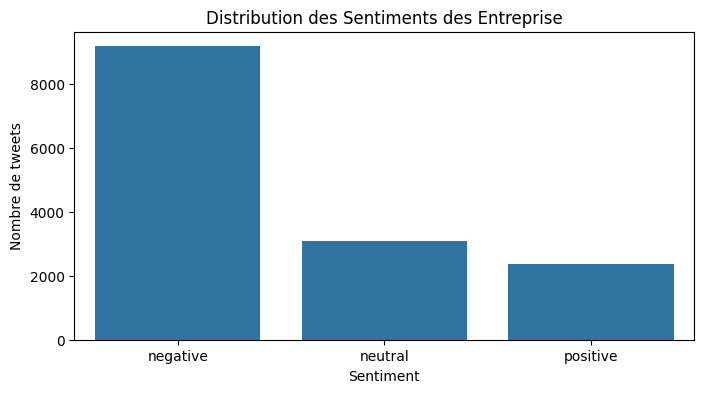

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.countplot(x='airline_sentiment', data=df, order=df['airline_sentiment'].value_counts().index)
plt.title('Distribution des Sentiments des Entreprise')
plt.xlabel('Sentiment')
plt.ylabel('Nombre de tweets')
plt.show()

C:\Users\abdel\AppData\Local\Temp\ipykernel_12036\505855963.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='airline', data=df, order=df['airline'].value_counts().index, palette='viridis')


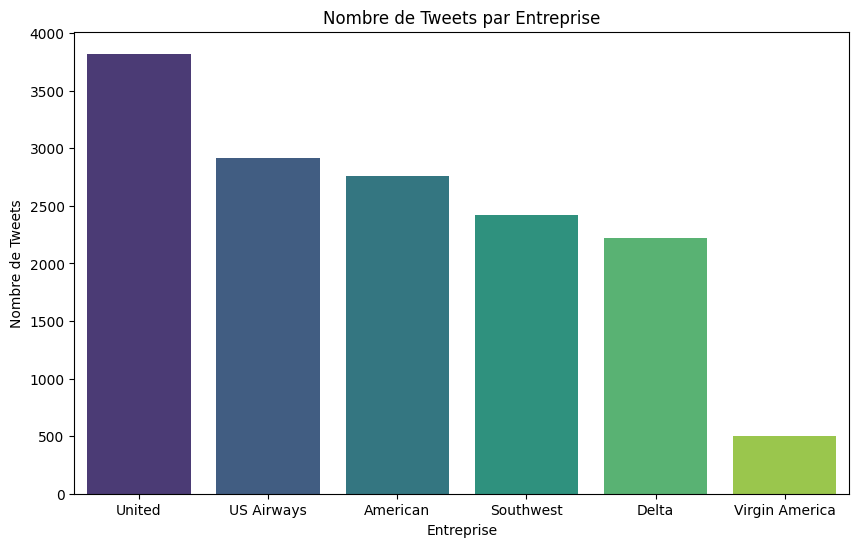

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x='airline', data=df, order=df['airline'].value_counts().index, palette='viridis')
plt.title('Nombre de Tweets par Entreprise')
plt.xlabel('Entreprise')
plt.ylabel('Nombre de Tweets')
plt.show()

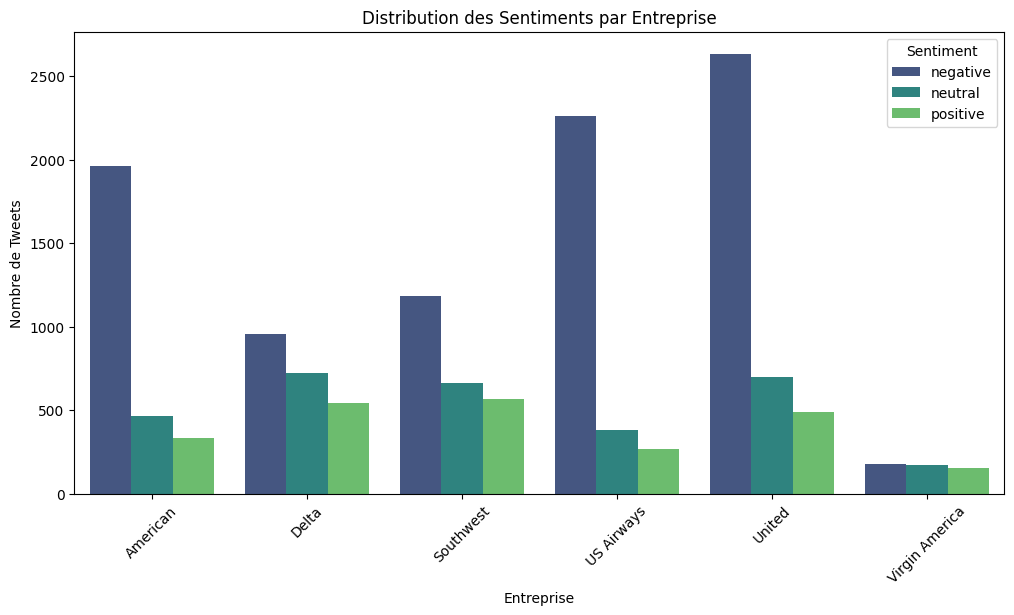

In [34]:
df_grouped = df.groupby(["airline", "airline_sentiment"])["text"].agg(["count"]).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    x='airline', 
    y='count', 
    hue='airline_sentiment', 
    data=df_grouped,
    palette='viridis'
)

plt.title('Distribution des Sentiments par Entreprise')
plt.xlabel('Entreprise')
plt.ylabel('Nombre de Tweets')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()